<a href="https://colab.research.google.com/github/it5joys135/ML-Projects/blob/main/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
# Load in the Data

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
print('X_train Shape: ', X_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train Shape:  (60000, 28, 28)


In [ ]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8658 - loss: 0.4689 - val_accuracy: 0.9591 - val_loss: 0.1398
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9561 - loss: 0.1490 - val_accuracy: 0.9676 - val_loss: 0.1029
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9673 - loss: 0.1079 - val_accuracy: 0.9740 - val_loss: 0.0846
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9732 - loss: 0.0883 - val_accuracy: 0.9746 - val_loss: 0.0821
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9770 - loss: 0.0723 - val_accuracy: 0.9762 - val_loss: 0.0781
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9796 - loss: 0.0640 - val_accuracy: 0.9768 - val_loss: 0.0730
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9819 - loss: 0.0549 - val_accuracy: 0.9791 - val_loss: 0.0762
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9839 - loss: 0.04

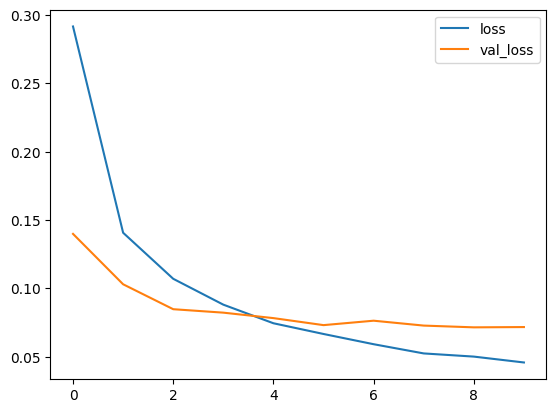

In [ ]:
# Plot loss per Iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

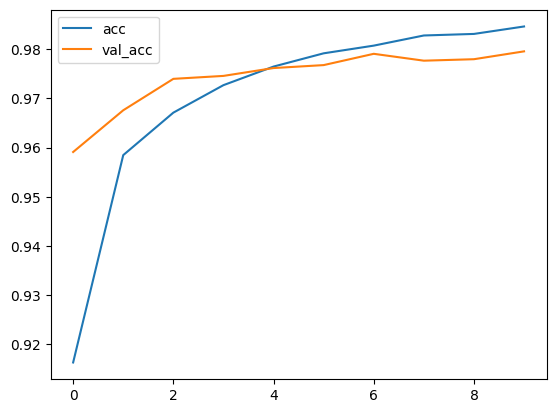

In [ ]:
# Plot accuracy per Iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [ ]:
# Ealuate the model
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.0881


[0.07155740261077881, 0.9796000123023987]

In [ ]:
pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[[ 972    0    1    0    1    0    3    1    2    0]
 [   0 1124    3    1    0    0    2    1    4    0]
 [   4    0 1013    2    1    0    1    8    2    1]
 [   1    0    6  991    0    2    0    3    3    4]
 [   0    0    4    0  962    0    3    1    2   10]
 [   2    0    0   14    1  861    3    1    7    3]
 [   3    3    0    2    4    4  939    0    3    0]
 [   1    5   11    0    0    0    0 1004    2    5]
 [   2    0    2    6    5    2    0    5  949    3]
 [   2    5    0    5    8    1    0    6    1  981]]
Axes(0.125,0.11;0.62x0.77)


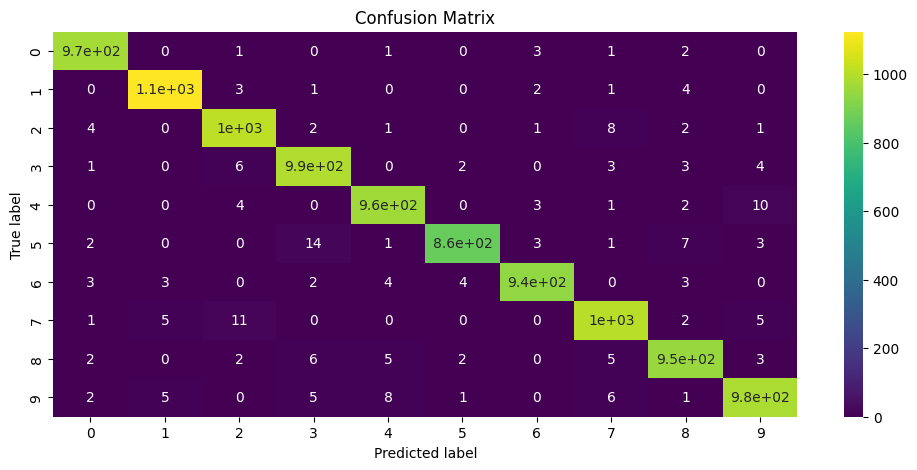

In [ ]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
import numpy as np

plt.figure(figsize=(12,5))
# Convert predictions to discrete class labels using argmax
pred_labels = np.argmax(pred, axis=1)

# Now, use pred_labels in the confusion_matrix function
print(confusion_matrix(y_test, pred_labels))
print(sns.heatmap(confusion_matrix(y_test, pred_labels), annot=True, cmap='viridis'))
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

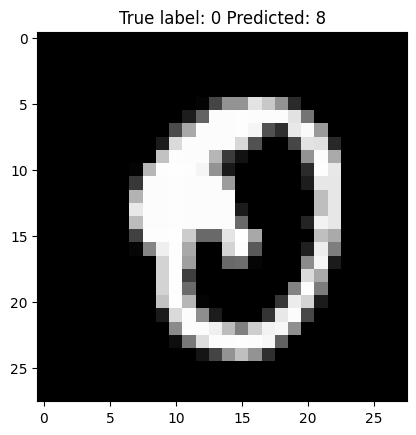

In [ ]:
# Show some misclassified samples
misclassified_idx = np.where(pred_labels != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], pred_labels[i]));